In [1]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# get pickled doc2vec model
with open('clean_df.pkl', 'rb') as f:
    clean_poem_df = pickle.load(f)
    
doc2vec_model = gensim.models.doc2vec.Doc2Vec.load("poem_doc2vec_dbow2000.pkl")

In [3]:
clean_poem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14779 entries, 1 to 15651
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   author             14779 non-null  category
 1   title              14779 non-null  object  
 2   content            14779 non-null  object  
 3   line               14779 non-null  object  
 4   length_in_lines    14779 non-null  int64   
 5   lexical_diversity  14779 non-null  float64 
 6   words              14779 non-null  object  
 7   word_lengths       14779 non-null  object  
 8   max_word_length    14779 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 1.1+ MB


In [4]:
poems = clean_poem_df.words.to_list()
# poems = [' '.join(poem).split() for poem in poems]
# poems[0]

In [5]:
poem_vector=[]

t = 1000

for i in range(len(poems)):
    if i % t == 0:
        print("poem", i, ":", poems[i])
        print("***")
    poem = poems[i]
    poem_vector.append(doc2vec_model.infer_vector(poem))
    
#save the lines_vector
poem_vector_file = "poem_vector_2000.pkl"
with open(poem_vector_file, 'wb') as f:
    pickle.dump((poem_vector), f)

poem 0 : ['philosophic', 'in', 'its', 'complex', 'ovoid', 'emptiness', 'a', 'skillful', 'pundit', 'coined', 'it', 'as', 'a', 'sort', 'of', 'stopgap', 'doorstop', 'for', 'those', 'quaint', 'equations', 'romans', 'never', 'dreamt', 'of', 'in', 'form', 'completely', 'clever', 'and', 'discretea', 'mirror', 'come', 'unsilvered', 'loose', 'watch', 'face', 'without', 'the', 'works', 'a', 'hollowed', 'globe', 'from', 'tip', 'to', 'toe', 'unbroken', 'it', 'evades', 'the', 'grappling', 'hooks', 'of', 'mass', 'tilts', 'the', 'thin', 'rim', 'of', 'no', 'thing', 'remains', 'embryonic', 'sum', 'non-cogito']
***
poem 1000 : ['it', 'began', 'in', 'a', 'foyer', 'of', 'evenings', 'the', 'evenings', 'left', 'traces', 'of', 'glass', 'in', 'the', 'trees', 'a', 'book', 'and', 'a', 'footpath', 'we', 'followed', 'under', 'throat-pipes', 'of', 'birds', 'we', 'moved', 'through', 'a', 'room', 'of', 'leaves', 'thin', 'streams', 'of', 'silver', 'buried', 'under', 'our', 'eyes', 'a', 'field', 'of', 'white', 'clover

In [6]:
# store vectors for convenience
X = np.vstack(poem_vector)
print(type(X))

<class 'numpy.ndarray'>


In [7]:
# perform normalization and PCA and output components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
X_normalized = pd.DataFrame(normalize(StandardScaler().fit_transform(X)))

pca_99 = PCA(n_components = 0.99)
pca_99.fit(X_normalized)
reduced = pd.DataFrame(pca_99.transform(X_normalized))

X_pc = PCA(n_components = 2).fit_transform(X_normalized)
X_principal = pd.DataFrame(X_pc)
X_principal.columns = ['P1', 'P2']

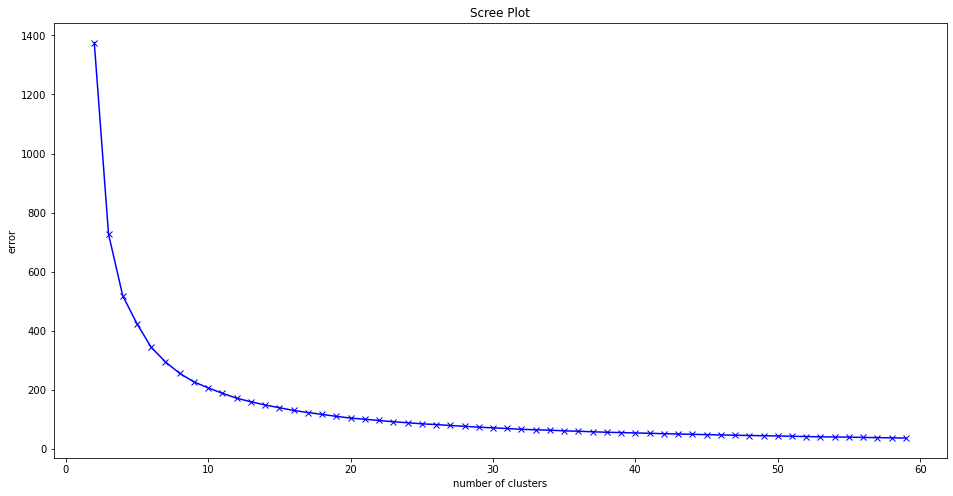

In [8]:
# determine best number of clusters for KMeans Clustering
from sklearn.cluster import KMeans
to_fit = X_principal
error = []
num_cluster_range = range(2,60)
for num_cluster in num_cluster_range:
    k_mean_model = KMeans(n_clusters=num_cluster, init = 'k-means++')
    k_mean_model.fit(to_fit)
    error.append(k_mean_model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(num_cluster_range, error, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.title('Scree Plot')
plt.show()

9


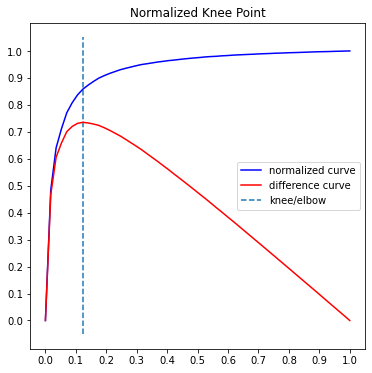

In [9]:
from kneed import KneeLocator
kn = KneeLocator(num_cluster_range, error, curve='convex', direction='decreasing')
print(kn.knee)
kn.plot_knee_normalized()

For n_clusters = 2 The average silhouette_score is : 0.6311072
For n_clusters = 3 The average silhouette_score is : 0.48455125
For n_clusters = 4 The average silhouette_score is : 0.43473774
For n_clusters = 5 The average silhouette_score is : 0.3956741
For n_clusters = 6 The average silhouette_score is : 0.40777996
For n_clusters = 7 The average silhouette_score is : 0.38395274
For n_clusters = 8 The average silhouette_score is : 0.3829122
For n_clusters = 9 The average silhouette_score is : 0.3814899
For n_clusters = 10 The average silhouette_score is : 0.37180302
For n_clusters = 11 The average silhouette_score is : 0.37299606
For n_clusters = 12 The average silhouette_score is : 0.37496057
For n_clusters = 13 The average silhouette_score is : 0.3736811
For n_clusters = 14 The average silhouette_score is : 0.3685041
For n_clusters = 15 The average silhouette_score is : 0.36759996
For n_clusters = 16 The average silhouette_score is : 0.3707812
For n_clusters = 17 The average silhouet

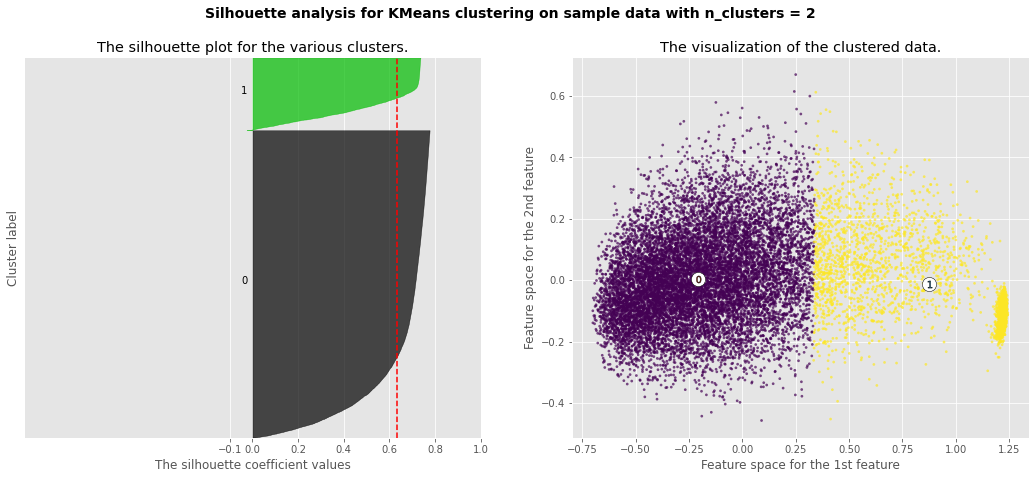

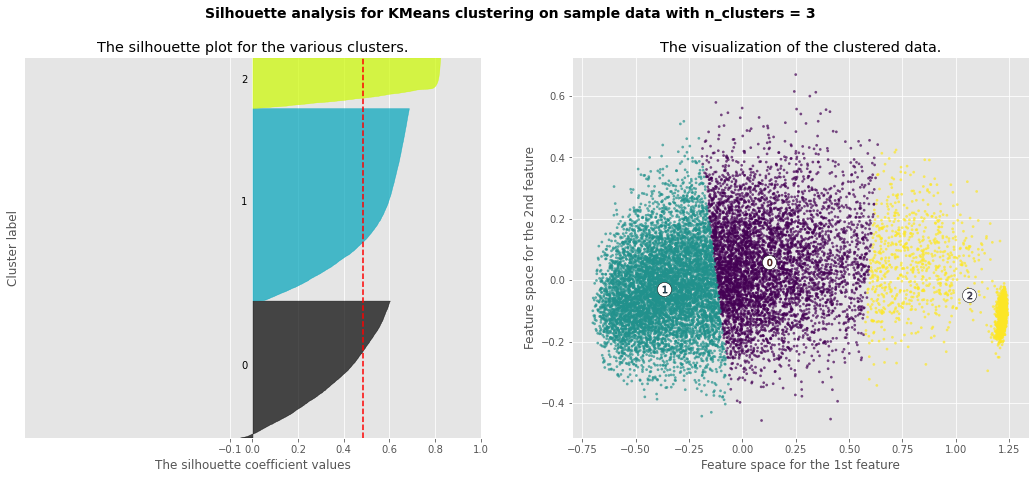

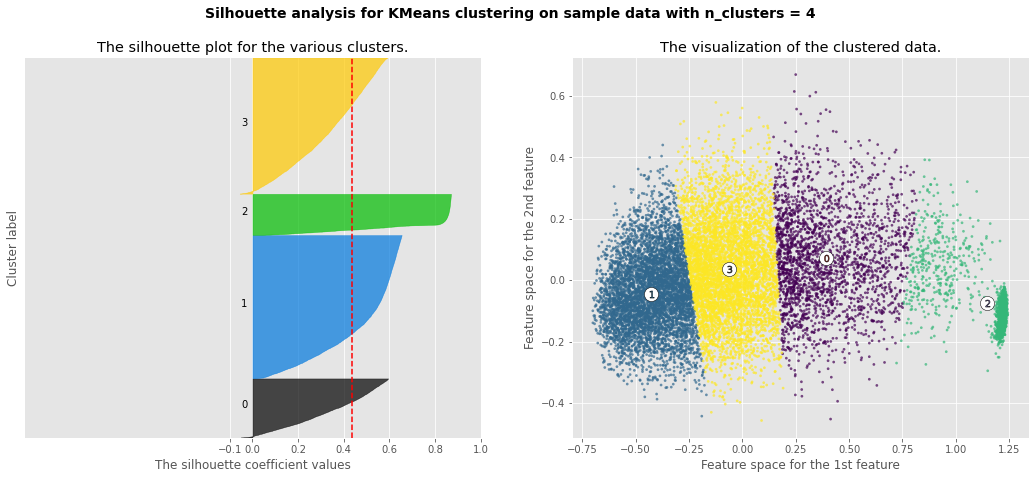

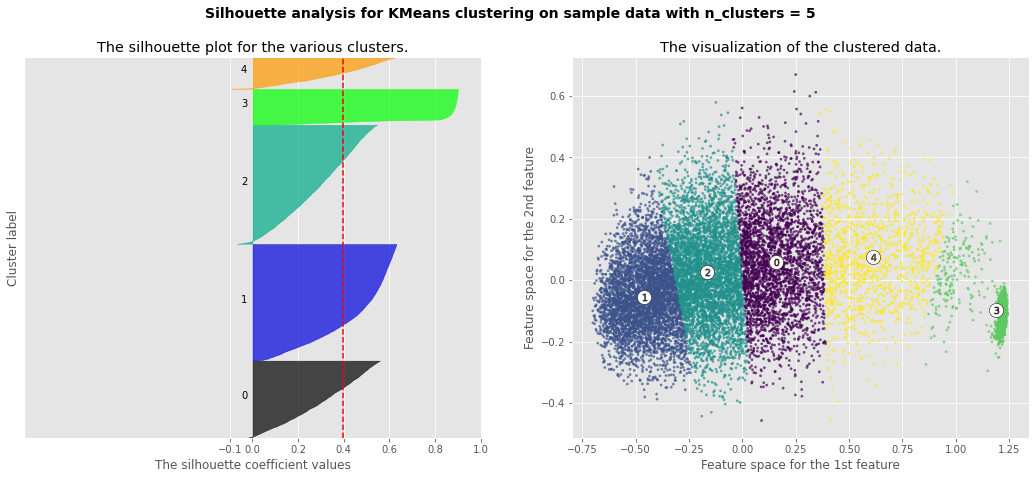

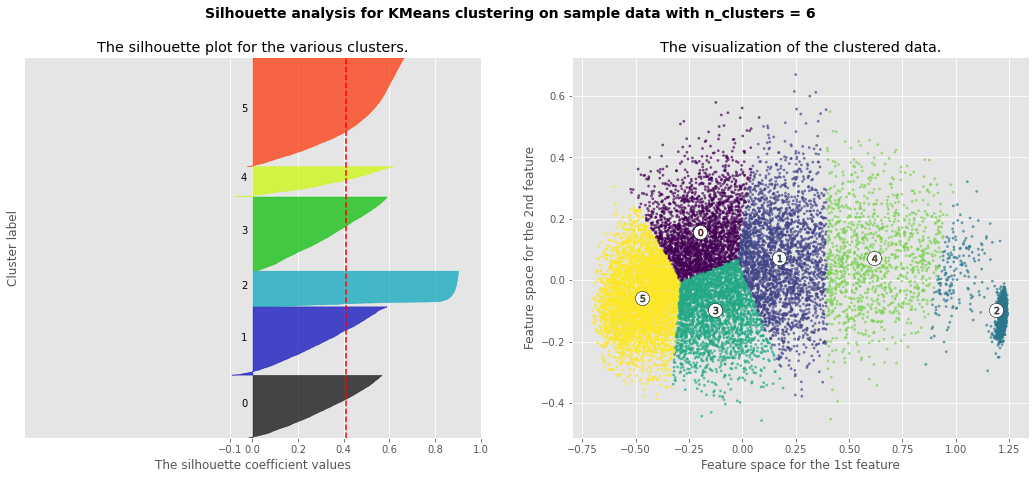

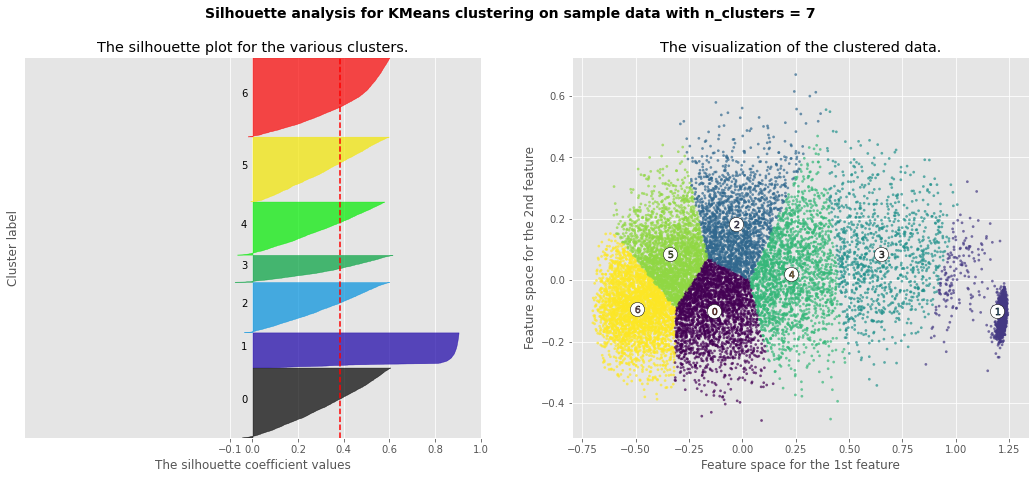

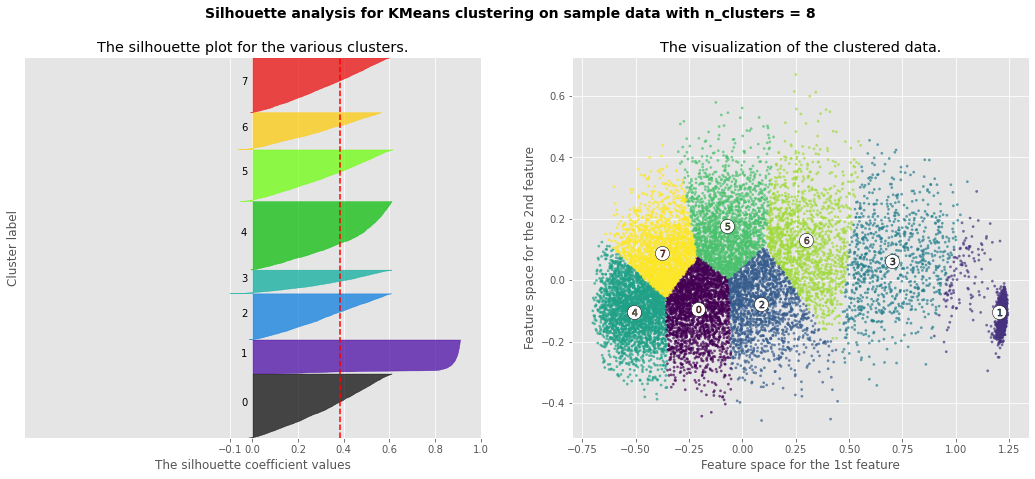

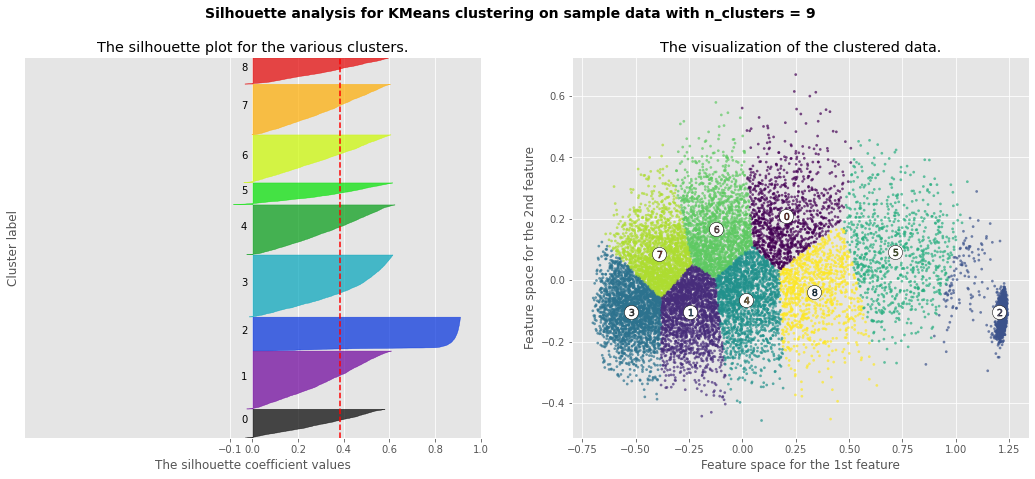

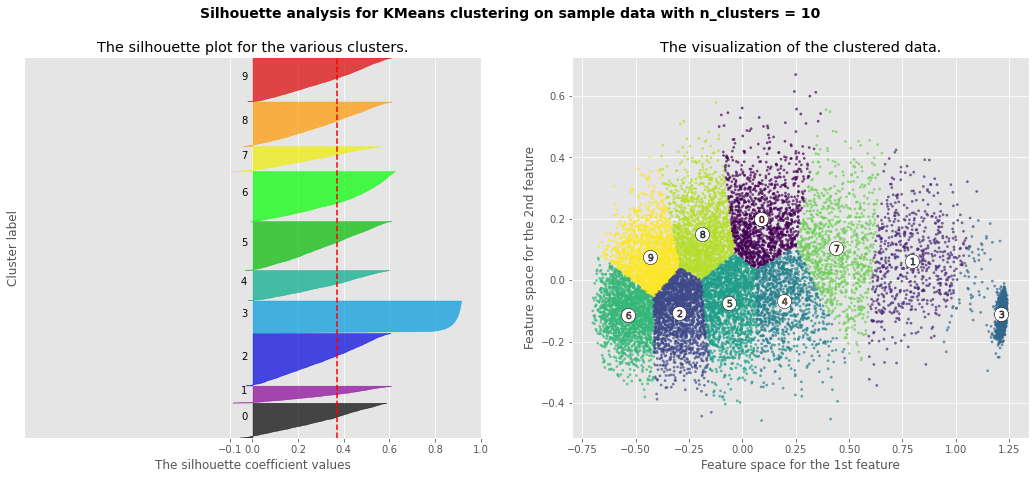

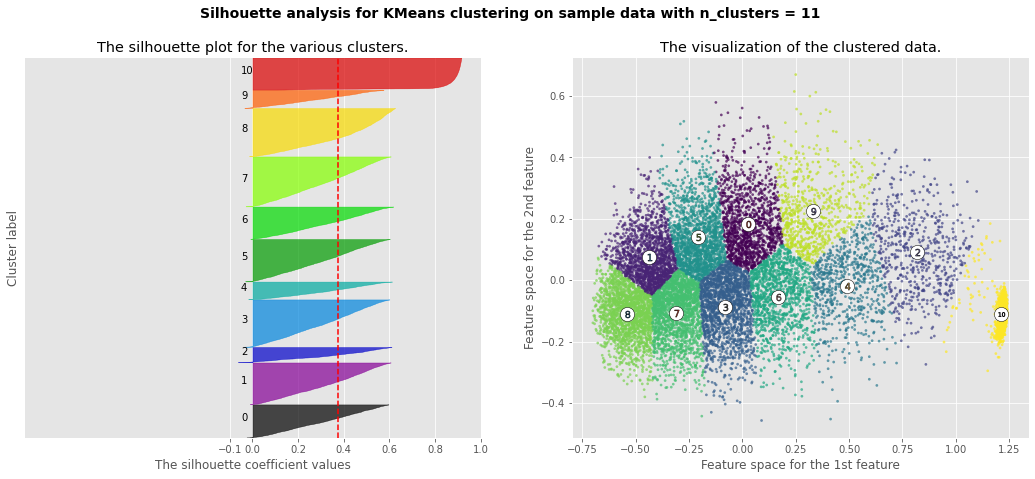

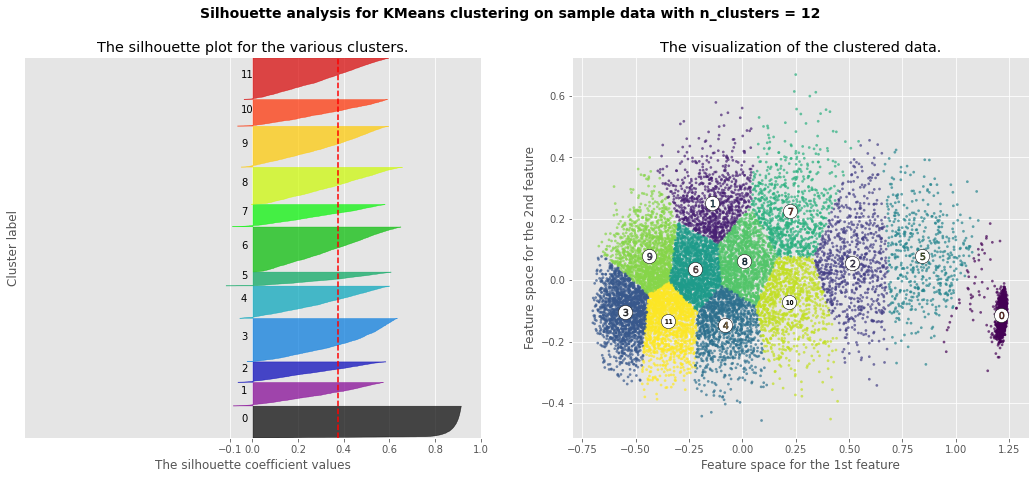

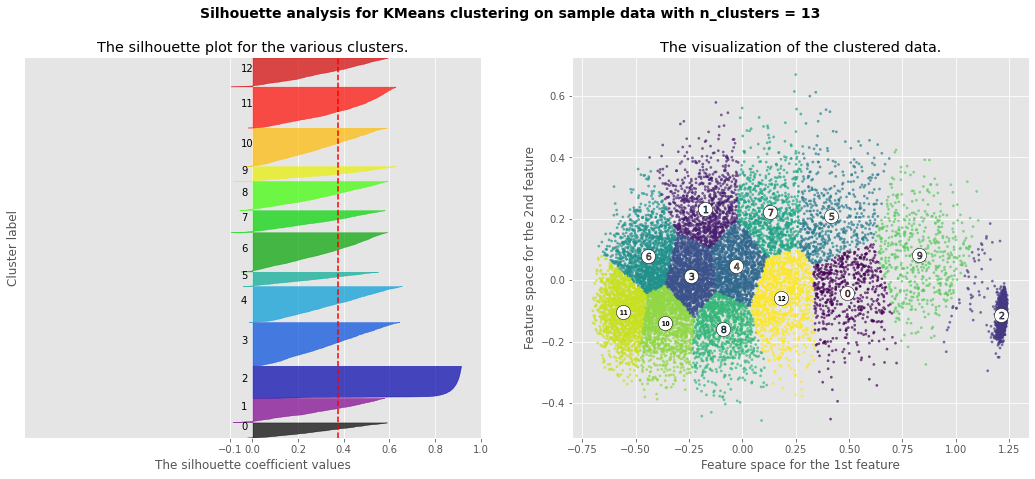

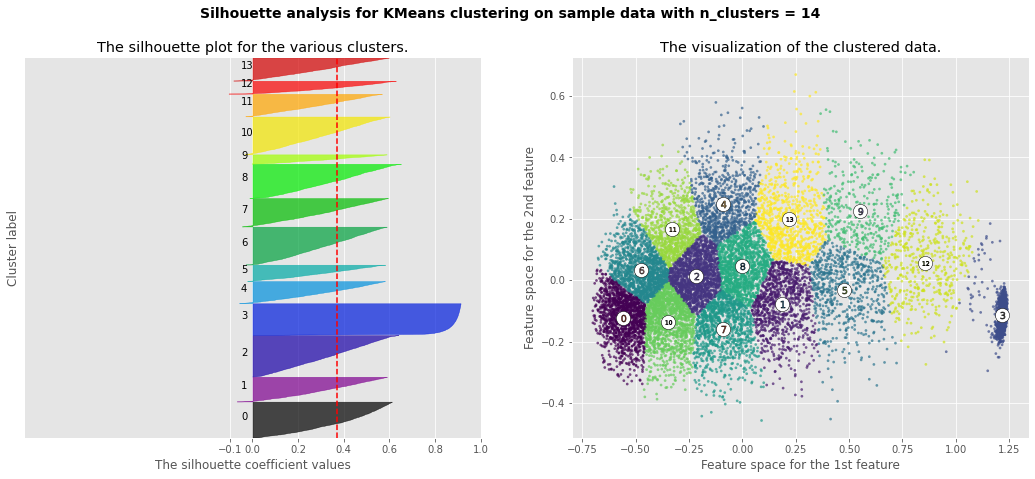

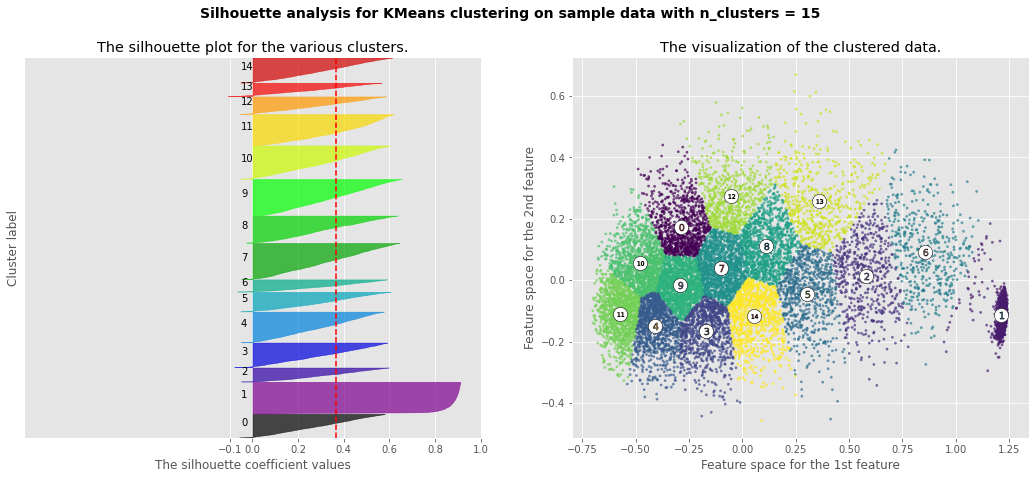

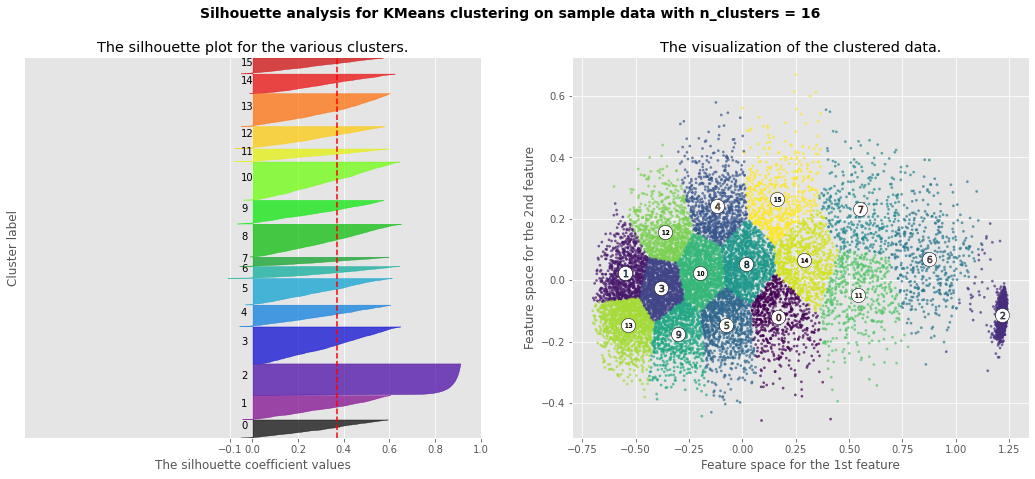

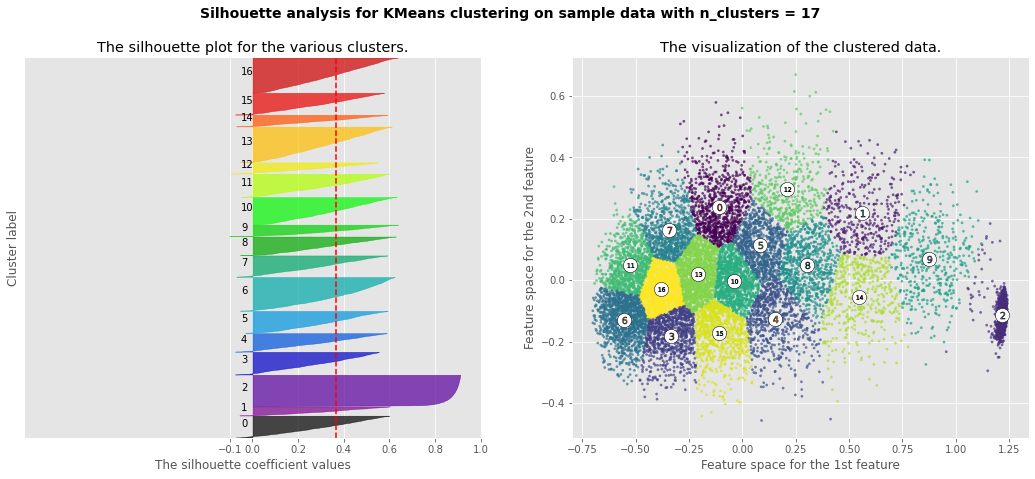

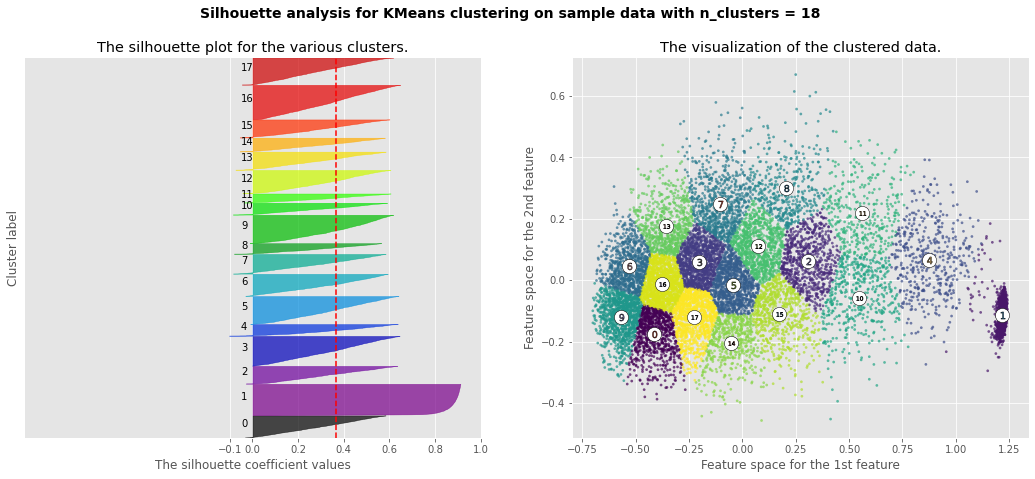

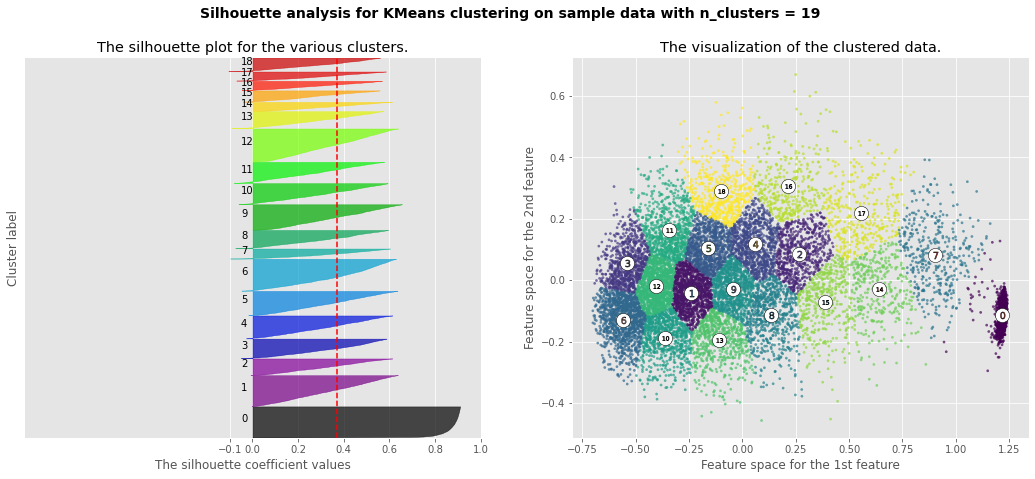

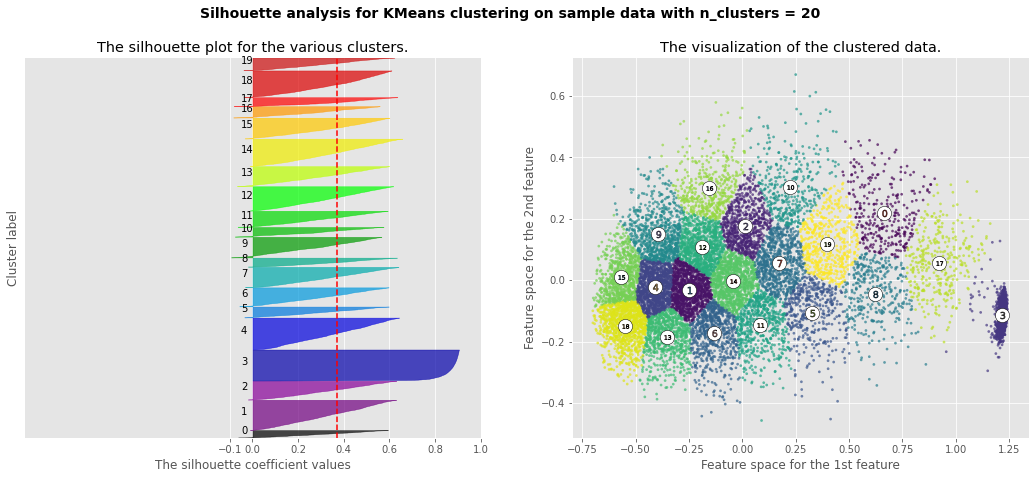

In [32]:
# from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# y = clean_poem_df.title
range_n_clusters = list(range(2,21))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    km_df = X_principal.copy()
    cluster_labels = clusterer.fit_predict(km_df)
    km_df['km_labels']=cluster_labels

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_principal, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_principal, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
     # Plotting resulting clusters
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(km_df['P1'],km_df['P2'],c=colors, marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [11]:
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(n_neighbors=2)
nbrs = knn_model.fit(to_fit)
distances, indices = nbrs.kneighbors(to_fit)

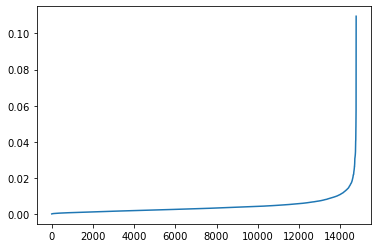

In [12]:
distances = np.sort(distances, axis=0)
distances1 = distances[:,1]
plt.plot(distances1)

In [13]:
df = pd.DataFrame(distances).iloc[:,1]

In [14]:
df = df.reset_index()
df.columns = ['id','distance']
print(df.head())

   id  distance
0   0  0.000021
1   1  0.000021
2   2  0.000038
3   3  0.000038
4   4  0.000051


In [15]:
sensitivity = [1, 3, 5, 10, 100, 200, 400]

# hold knee points for each sensitivity
knees = []
norm_knees = []

# S should be chosen as a function of how many points are in the system (n)
n = 1000
x = df.id
y = df.distance
for s in sensitivity:
    kl = KneeLocator(x, y, curve='convex', direction='increasing', S=s)
    knees.append(kl.knee)
    norm_knees.append(kl.norm_knee)

print(f'Knees: {knees}')

print(f'Normalized Knees: {[nk.round(2) for nk in norm_knees]}')

Knees: [14771, 14451, 14052, 13750, 12502, 12502, 12053]
Normalized Knees: [0.0, 0.02, 0.05, 0.07, 0.15, 0.15, 0.18]


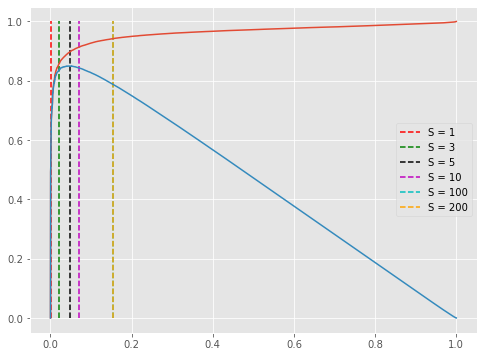

In [16]:
plt.style.use('ggplot');
plt.figure(figsize=(8, 6));
plt.plot(kl.x_normalized, kl.y_normalized);
plt.plot(kl.x_difference, kl.y_difference);
colors = ['r', 'g', 'k', 'm', 'c', 'orange']
for k, c, s in zip(norm_knees, colors, sensitivity):
    plt.vlines(k, 0, 1, linestyles='--', colors=c, label=f'S = {s}');
plt.legend();

14052
id          14052.000000
distance        0.011143
Name: 14052, dtype: float64


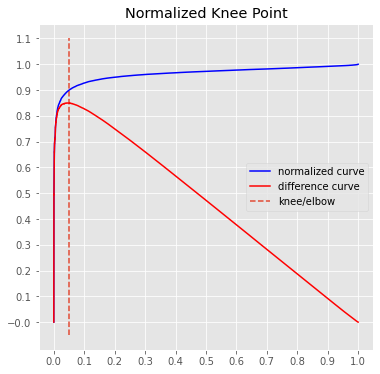

In [17]:
kn = KneeLocator(df.id,df.distance, curve='convex', direction='increasing', S=5)
print(kn.knee)
kn.plot_knee_normalized()
print(df.iloc[kn.knee])

In [18]:
from sklearn.preprocessing import StandardScaler, normalize
X_normalized = pd.DataFrame(normalize(StandardScaler().fit_transform(X)))

In [19]:
# create function to plot DBSCAN clustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

def plot_DBSCAN(db,X):
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [30]:
# find best hyperparameters for dbscan
def dbgridsearch(X, epsilon_list, sample_list):
    dict_list = []
    for epsilon in epsilon_list:
        for m_sample in sample_list:
            db = DBSCAN(eps=epsilon, min_samples=m_sample).fit(X)
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            if n_clusters_ > 1:
                n_noise_ = list(labels).count(-1)
                s_score = metrics.silhouette_score(X, labels)
                if s_score > 0:
                    results = {'epsilon':epsilon, \
                               'min_samples':m_sample, \
                               'n_clusters':n_clusters_, \
                               'n_noise':n_noise_, \
                               'silhouette':s_score}
                    print(results)
                    dict_list.append(results)
            
    return pd.DataFrame(dict_list)

In [33]:
epsilon_candidates = [0.017, 0.05, 0.06, 0.09, 0.12, 0.15, 0.19, 0.25, 0.5]
min_samples = [5, 10, 25, 50, 200, 300]
db_results = dbgridsearch(X_principal,epsilon_candidates, min_samples)

{'epsilon': 0.05, 'min_samples': 25, 'n_clusters': 2, 'n_noise': 347, 'silhouette': 0.44382343}
{'epsilon': 0.05, 'min_samples': 50, 'n_clusters': 2, 'n_noise': 1297, 'silhouette': 0.49075434}
{'epsilon': 0.05, 'min_samples': 200, 'n_clusters': 2, 'n_noise': 5194, 'silhouette': 0.3517426}
{'epsilon': 0.06, 'min_samples': 25, 'n_clusters': 2, 'n_noise': 183, 'silhouette': 0.4610078}
{'epsilon': 0.06, 'min_samples': 50, 'n_clusters': 2, 'n_noise': 541, 'silhouette': 0.4643455}
{'epsilon': 0.06, 'min_samples': 200, 'n_clusters': 2, 'n_noise': 3297, 'silhouette': 0.42370826}
{'epsilon': 0.06, 'min_samples': 300, 'n_clusters': 2, 'n_noise': 5217, 'silhouette': 0.3635555}
{'epsilon': 0.09, 'min_samples': 50, 'n_clusters': 2, 'n_noise': 77, 'silhouette': 0.45767412}
{'epsilon': 0.09, 'min_samples': 200, 'n_clusters': 2, 'n_noise': 1332, 'silhouette': 0.5211837}
{'epsilon': 0.09, 'min_samples': 300, 'n_clusters': 2, 'n_noise': 1847, 'silhouette': 0.5015606}
{'epsilon': 0.12, 'min_samples': 200

In [22]:
print(db_results.describe())

         epsilon  min_samples  n_clusters       n_noise  silhouette
count  18.000000    18.000000   18.000000     18.000000   18.000000
mean    0.064889   143.888889    8.555556   2765.777778    0.266908
std     0.038628   121.104665   17.803576   3306.717985    0.338599
min     0.017000     5.000000    2.000000     77.000000   -0.317700
25%     0.050000    31.250000    2.000000    421.000000    0.058214
50%     0.060000   125.000000    2.000000   1314.500000    0.450749
75%     0.090000   275.000000    2.750000   4719.750000    0.498859
max     0.150000   300.000000   74.000000  11959.000000    0.535837


In [23]:
print(db_results[db_results.silhouette > 0].sort_values(by=['n_noise','epsilon']))
# sns.displot(data=db_results, x='silhouette', y='epsilon')
# sns.displot(data=db_results, x='n_clusters', y='silhouette')
# sns.scatterplot(data=db_results, x='epsilon', y='silhouette', hue='n_noise')

    epsilon  min_samples  n_clusters  n_noise  silhouette
12     0.09           50           2       77    0.457674
17     0.15          300           2      182    0.516262
8      0.06           25           2      183    0.461008
4      0.05           25           2      347    0.443823
15     0.12          200           2      381    0.523843
9      0.06           50           2      541    0.464346
16     0.12          300           2      915    0.535837
5      0.05           50           2     1297    0.490754
13     0.09          200           2     1332    0.521184
14     0.09          300           2     1847    0.501561
10     0.06          200           2     3297    0.423708
6      0.05          200           2     5194    0.351743
11     0.06          300           2     5217    0.363555


In [24]:
db = DBSCAN(eps=0.09, min_samples=50).fit(X_principal)

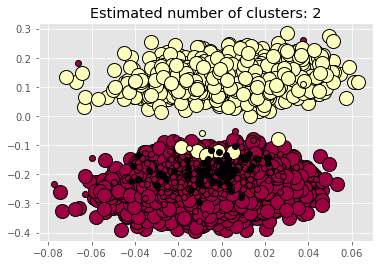

In [25]:
plot_DBSCAN(db,X_principal)

In [26]:
X_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14779 entries, 0 to 14778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      14779 non-null  float32
 1   P2      14779 non-null  float32
dtypes: float32(2)
memory usage: 115.6 KB


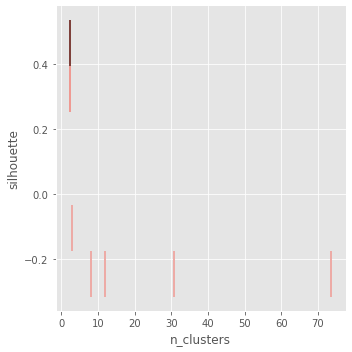

In [27]:
# x = db_results.epsilon
# y = db_results.silhouette
sns.displot(data = db_results, x='n_clusters', y='silhouette')
# sns.pairplot(data=db_results)

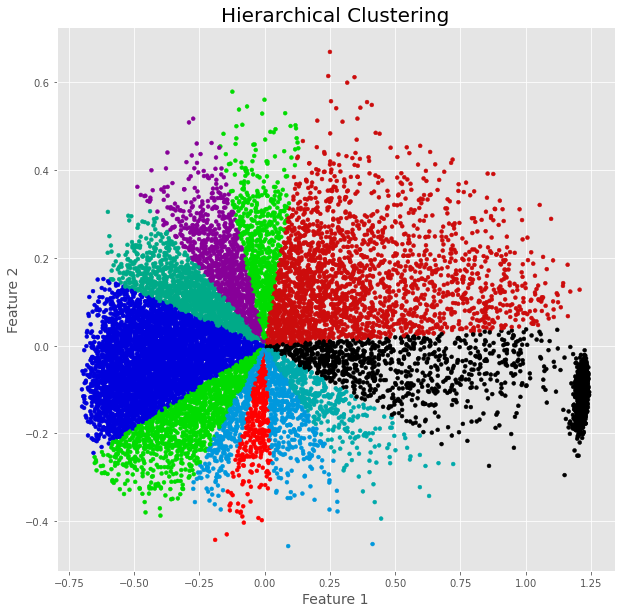

In [42]:
# clustering with hierarchical/agglomerative
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=12, affinity='cosine', linkage="complete")
model.fit(X_principal)

HR_df = X_principal.copy()
HR_df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(HR_df['P1'],HR_df['P2'],c=HR_df['HR_labels'],cmap=mpl.colors.ListedColormap(colors),s=15)
plt.title(f'Hierarchical Clustering with {n_clusters} Clusters',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.legend()
plt.show()

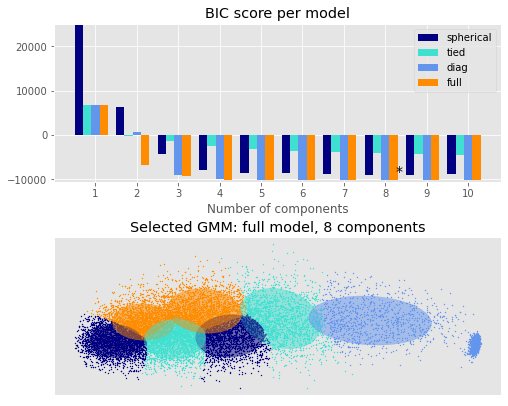

In [52]:
# gaussian mixture model -- https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py
from sklearn import mixture
from scipy import linalg
import itertools
lowest_bic = np.infty
bic = []
n_components_range = range(1, 11)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_principal)
        bic.append(gmm.bic(X_principal))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X_principal)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_principal.to_numpy()[Y_ == i, 0], X_principal.to_numpy()[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(f'Selected GMM: {best_gmm.covariance_type} model, '
          f'{best_gmm.n_components} components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [ ]:
print(X.shape)

In [ ]:
print(X[0].ndim)

In [ ]:
print(X[0].shape)